In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
import json
import os
from helpers import extract_stats, cmd_output_to_dict, flatpak_date_to_datetime
import subprocess

In [2]:
stats = extract_stats('../results/rebuild_half_flathub/')

### Rerpoduciblity ratio

In [3]:
reproducible = list()
non_reproducible = list()
build_fail = list()
for stat in stats:
    if stat['build_sucess'] == True:
        if stat['is_reproducible'] == True:
            reproducible.append(stat)
        else:
            non_reproducible.append(stat)
    else:
        build_fail.append(stat)

In [4]:
n_repro = len(reproducible)
n_nonrepro = len(non_reproducible)
n_fail = len(build_fail)
total = n_fail + n_nonrepro + n_repro
ratio_repro = n_repro/total
print(f"There were {n_repro} reproducible programs, {n_nonrepro} non-reproducible one and {n_fail} failed to build.")
print(f"That means we reached {ratio_repro*100.0}% reproducibility !")

There were 306 reproducible programs, 368 non-reproducible one and 55 failed to build.
That means we reached 41.9753086419753% reproducibility !


### Bin reproducibility ratio

In [5]:
bin_reproducible = list()
non_bin_reproducible = list()
for stat in stats:
    if stat['build_sucess'] == True:
        if stat['is_bin_reproducible'] == True:
            bin_reproducible.append(stat)
        else:
            non_bin_reproducible.append(stat)       

In [6]:
n_brepro = len(bin_reproducible)
n_nonbrepro = len(non_bin_reproducible)
ratio_repro = n_brepro/total
print(f"There were {n_brepro} binary-reproducible programs, {n_nonbrepro} binary-non-reproducible one and {n_fail} failed to build.")
print(f"That means we reached {ratio_repro*100.0}% binary reproducibility !")

There were 423 binary-reproducible programs, 251 binary-non-reproducible one and 55 failed to build.
That means we reached 58.0246913580247% binary reproducibility !


### Are older/not up-to-date programs less reproducible ?

In [7]:
def find_commit_date(ref):
    cmd = ['flatpak', 'remote-info', 'flathub', ref, '--system']
    last_ostree_commit_date = cmd_output_to_dict(subprocess.run(cmd,capture_output=True).stdout.decode('UTF-8'))
    if last_ostree_commit_date.get('Date') is None:
        return None
    last_ostree_commit_date = flatpak_date_to_datetime(last_ostree_commit_date['Date'])
    return last_ostree_commit_date

In [8]:
repro_date = [find_commit_date(stat['name']) for stat in bin_reproducible]
non_repro_date = [find_commit_date(stat['name']) for stat in non_bin_reproducible]

In [9]:
repro_date = [d for d in repro_date if d is not None]
non_repro_date = [d for d in non_repro_date if d is not None]

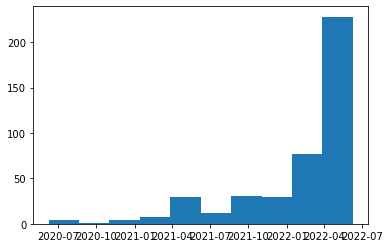

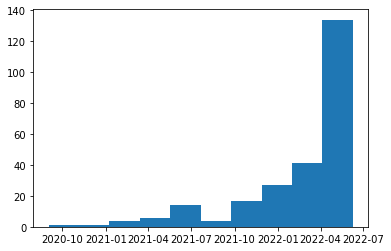

In [10]:
plt.hist(repro_date)
plt.show()
plt.hist(non_repro_date)
plt.show()

### Random stats

In [11]:
arch_desktop_build_time = [stat['build_time'] for stat in stats if stat['machine'] == "desktop-arch" and stat['build_sucess'] == True]

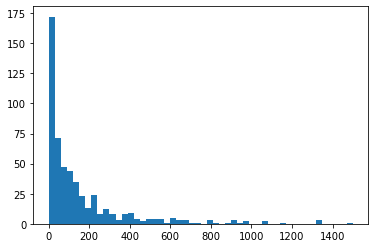

In [12]:
plt.hist(arch_desktop_build_time, bins=50, range=(0,1500))
plt.show()

In [13]:
deps_size = [stat['cache_size'] for stat in stats if stat['build_sucess'] == True]

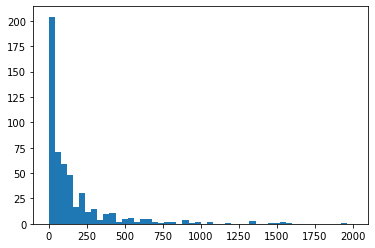

In [14]:
plt.hist(arch_desktop_build_time, bins=50, range=(0,2000))
plt.show()

In [15]:
time_deps = [(stat['build_time'], stat['cache_size']) for stat in stats if stat['build_sucess'] == True and stat['machine'] == "desktop-arch"]

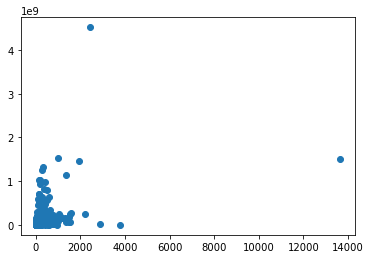

In [16]:
plt.scatter(*zip(*time_deps))
plt.show()